In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
raw_df = pd.read_csv('raw_data/2022-01-01_2022-06-30_twitter_transferlearning.csv')
raw_df

,Unnamed: 0,date,negative_bert,neutral_bert,positive_bert
0,0,2022-01-01,32.794384,162.44478,128.76099
1,1,2022-01-02,30.321379,162.43115,123.24740
2,2,2022-01-03,51.884796,251.08696,219.02808
3,3,2022-01-04,39.254400,226.56316,176.18260
4,4,2022-01-05,74.387710,288.17532,211.43690
...,...,...,...,...,...
176,176,2022-06-26,48.231260,264.08527,147.68365
177,177,2022-06-27,69.526820,326.43304,188.04004
178,178,2022-06-28,47.574753,322.94010,181.48535
179,179,2022-06-29,69.620320,310.96848,196.41122


In [3]:
df = raw_df.drop('Unnamed: 0',axis=1)
df

,date,negative_bert,neutral_bert,positive_bert
0,2022-01-01,32.794384,162.44478,128.76099
1,2022-01-02,30.321379,162.43115,123.24740
2,2022-01-03,51.884796,251.08696,219.02808
3,2022-01-04,39.254400,226.56316,176.18260
4,2022-01-05,74.387710,288.17532,211.43690
...,...,...,...,...
176,2022-06-26,48.231260,264.08527,147.68365
177,2022-06-27,69.526820,326.43304,188.04004
178,2022-06-28,47.574753,322.94010,181.48535
179,2022-06-29,69.620320,310.96848,196.41122


In [4]:
def trad_strat(df,btc):
    
    X = df[['date']]
    X['date'] = pd.to_datetime(X['date'])
    btc['date'] = pd.to_datetime(btc['Date'])
    
    X['Daily_Average_Sentiment']=df['positive_bert']/df.iloc[:,1:].sum(axis=1)
    
    
    X['MA20_Sentiment'] = X['Daily_Average_Sentiment'].rolling(window=21).mean()
    X['MA50_Sentiment'] = X['Daily_Average_Sentiment'].rolling(window=51).mean()
    
    X['Threshold_50'] = X['Daily_Average_Sentiment']>X['MA50_Sentiment']
    X['Threshold_20'] = X['Daily_Average_Sentiment']>X['MA20_Sentiment']
    X['Buy_Sell'] = X['Threshold_50'] & X['Threshold_20']
    
    NX = X.merge(btc,how='inner',on='date')
    NNX= NX[['date','Daily_Average_Sentiment', 'MA50_Sentiment','MA20_Sentiment','Threshold_50','Threshold_20',
             'Buy_Sell','Adj Close']]
    
    return NNX

In [14]:
btc = pd.read_csv("raw_data/2020-03-10_2023-03-10_BTC-USD_1d.csv")
btest = btc.copy()

In [15]:
btest

,Date,Open,High,Low,Close,Adj Close,Volume,Symbol,price_change
0,2020-03-10,7922.146973,8136.945312,7814.763184,7909.729492,7909.729492,42213940994,BTC-USD,NaN
1,2020-03-11,7910.089844,7950.814453,7642.812500,7911.430176,7911.430176,38682762605,BTC-USD,0.000215
2,2020-03-12,7913.616211,7929.116211,4860.354004,4970.788086,4970.788086,53980357243,BTC-USD,-0.371695
3,2020-03-13,5017.831055,5838.114746,4106.980957,5563.707031,5563.707031,74156772075,BTC-USD,0.119281
4,2020-03-14,5573.077637,5625.226562,5125.069336,5200.366211,5200.366211,36154506008,BTC-USD,-0.065306
...,...,...,...,...,...,...,...,...,...
1090,2023-03-05,22354.144531,22613.685547,22307.142578,22435.513672,22435.513672,13317001733,BTC-USD,0.003676
1091,2023-03-06,22436.816406,22584.292969,22331.314453,22429.757812,22429.757812,17353192895,BTC-USD,-0.000257
1092,2023-03-07,22428.322266,22527.417969,22011.261719,22219.769531,22219.769531,22765452204,BTC-USD,-0.009362
1093,2023-03-08,22216.441406,22268.896484,21708.050781,21718.080078,21718.080078,22536575684,BTC-USD,-0.022579


In [16]:
X = trad_strat(df,btest)
X

/var/folders/m3/wrwzlkcn30j_t2hg5r1616g80000gn/T/ipykernel_59638/1531336842.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['date'] = pd.to_datetime(X['date'])
/var/folders/m3/wrwzlkcn30j_t2hg5r1616g80000gn/T/ipykernel_59638/1531336842.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Daily_Average_Sentiment']=df['positive_bert']/df.iloc[:,1:].sum(axis=1)
/var/folders/m3/wrwzlkcn30j_t2hg5r1616g80000gn/T/ipykernel_59638/1531336842.py:10: SettingWithCopyWarning: 
A value is trying to be set on a co

,date,Daily_Average_Sentiment,MA50_Sentiment,MA20_Sentiment,Threshold_50,Threshold_20,Buy_Sell,Adj Close
0,2022-01-01,0.397410,NaN,NaN,False,False,False,47686.812500
1,2022-01-02,0.390024,NaN,NaN,False,False,False,47345.218750
2,2022-01-03,0.419594,NaN,NaN,False,False,False,46458.117188
3,2022-01-04,0.398603,NaN,NaN,False,False,False,45897.574219
4,2022-01-05,0.368357,NaN,NaN,False,False,False,43569.003906
...,...,...,...,...,...,...,...,...
176,2022-06-26,0.321051,0.352555,0.341142,False,False,False,21027.294922
177,2022-06-27,0.321986,0.351254,0.339868,False,False,False,20735.478516
178,2022-06-28,0.328778,0.351085,0.339160,False,False,False,20280.634766
179,2022-06-29,0.340401,0.351037,0.337661,False,True,False,20104.023438


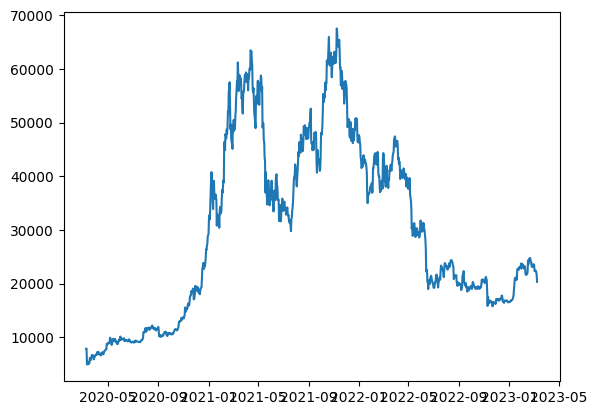

In [17]:
plt.plot(btest['date'],btest['Adj Close'])

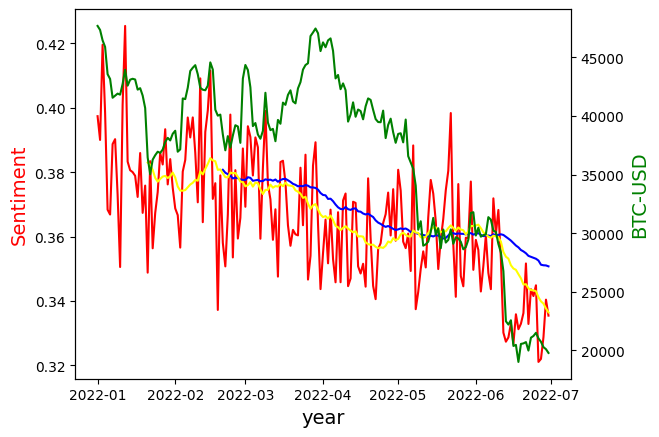

In [18]:
# create figure and axis objects with subplots()
fig,ax = plt.subplots()
# make a plot
ax.plot(X['date'],X['Daily_Average_Sentiment'],color="red")
ax.plot(X['date'],X['MA50_Sentiment'],color="blue")
ax.plot(X['date'],X['MA20_Sentiment'],color="yellow")
# set x-axis label
ax.set_xlabel("year", fontsize = 14)
# set y-axis label
ax.set_ylabel("Sentiment",color="red",fontsize=14)


# twin object for two different y-axis on the sample plot
ax2=ax.twinx()
# make a plot with different y-axis using second axis object
ax2.plot(X['date'],X['Adj Close'],color="green")
ax2.set_ylabel("BTC-USD",color="green",fontsize=14)
plt.show()
# save the plot as a file
# fig.savefig('two_different_y_axis_for_single_python_plot_with_twinx.jpg',
#             format='jpeg',
#             dpi=100,
#             bbox_inches='tight')

In [ ]:
buy = X.columns.get_loc("Buy_Sell")
X.iloc[1,buy]

In [20]:
total_amt = 1000
daily_amt = 100
X['bitcoin_held']=0
X['cash_held']= total_amt
btc = X.columns.get_loc("Adj Close")
buy = X.columns.get_loc("Buy_Sell")
btc_held = X.columns.get_loc("bitcoin_held")
cash_held = X.columns.get_loc("cash_held")

for i in range(len(X)): 
    if X.iloc[i,buy]:
        X.iloc[i,btc_held] = X.iloc[i-1,btc_held] + daily_amt/X.iloc[i,btc]
        X.iloc[i,cash_held] = X.iloc[i-1,cash_held] - daily_amt
    else:
        X.iloc[i,cash_held] = X.iloc[i-1,btc_held]*X.iloc[i,btc] + X.iloc[i-1,cash_held]
#         X.iloc[i,btc_held] = 0
    
X['equity_held'] = X['bitcoin_held']*X['Adj Close']+X['cash_held']
    

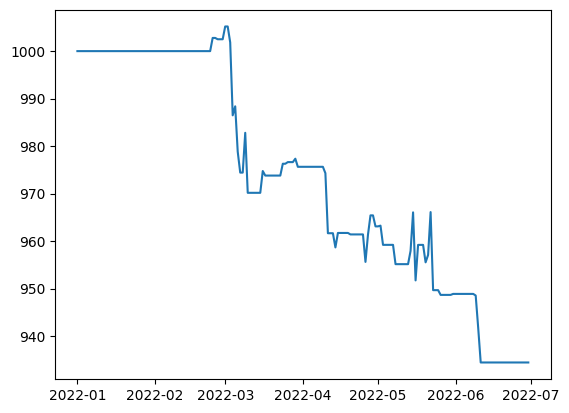

In [21]:
plt.plot(X['date'],X['equity_held'])

In [ ]:
def short_trad_strat(df,btc):
    
    X = df[['date']]
    X['date'] = pd.to_datetime(X['date'])
    btc['date'] = pd.to_datetime(btc['Date'])
    
    X['Daily_Average_Sentiment']=df['positive_bert']/df.iloc[:,1:].sum(axis=1)
    
    
    X['MA20_Sentiment'] = X['Daily_Average_Sentiment'].rolling(window=21).mean()
    X['MA50_Sentiment'] = X['Daily_Average_Sentiment'].rolling(window=51).mean()
    
    X['Threshold_50'] = X['Daily_Average_Sentiment']>X['MA50_Sentiment']
    X['Threshold_20'] = X['Daily_Average_Sentiment']>X['MA20_Sentiment']
    X['Buy_Sell'] = X['Threshold_50'] & X['Threshold_20']
    
    NX = X.merge(btc,how='inner',on='date')
    NNX= NX[['date','Daily_Average_Sentiment', 'MA50_Sentiment','MA20_Sentiment','Threshold_50','Threshold_20',
             'Buy_Sell','Adj Close']]
    
    return NNX

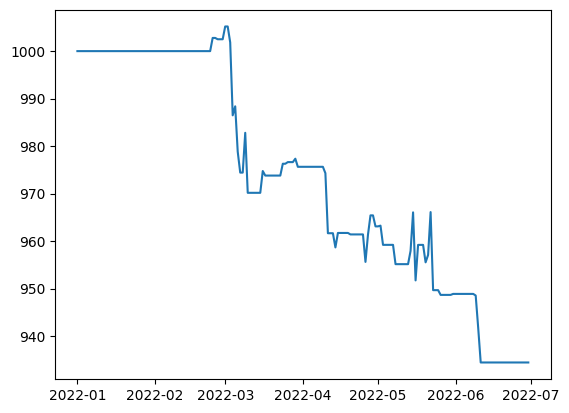

In [22]:
plt.plot(X['date'],X['equity_held'])

In [23]:
X = trad_strat(df,btest)
total_amt = 1000
daily_amt = 100
X['bitcoin_held']=0
X['cash_held']= total_amt
btc = X.columns.get_loc("Adj Close")
buy = X.columns.get_loc("Buy_Sell")
btc_held = X.columns.get_loc("bitcoin_held")
cash_held = X.columns.get_loc("cash_held")

for i in range(len(X)): 
    if X.iloc[i,buy]:
        X.iloc[i,btc_held] = X.iloc[i-1,btc_held] + daily_amt/X.iloc[i,btc]
        X.iloc[i,cash_held] = X.iloc[i-1,cash_held] - daily_amt
    else:
        X.iloc[i,cash_held] = X.iloc[i-1,btc_held]*X.iloc[i,btc] + X.iloc[i-1,cash_held] - daily_amt
        X.iloc[i,btc_held] = -daily_amt/X.iloc[i,btc] 
X
# X['equity_held'] = X['bitcoin_held']*X['Adj Close']+X['cash_held']

/var/folders/m3/wrwzlkcn30j_t2hg5r1616g80000gn/T/ipykernel_59638/1531336842.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['date'] = pd.to_datetime(X['date'])
/var/folders/m3/wrwzlkcn30j_t2hg5r1616g80000gn/T/ipykernel_59638/1531336842.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Daily_Average_Sentiment']=df['positive_bert']/df.iloc[:,1:].sum(axis=1)
/var/folders/m3/wrwzlkcn30j_t2hg5r1616g80000gn/T/ipykernel_59638/1531336842.py:10: SettingWithCopyWarning: 
A value is trying to be set on a co

,date,Daily_Average_Sentiment,MA50_Sentiment,MA20_Sentiment,Threshold_50,Threshold_20,Buy_Sell,Adj Close,bitcoin_held,cash_held
0,2022-01-01,0.397410,NaN,NaN,False,False,False,47686.812500,-0.002097,900.000000
1,2022-01-02,0.390024,NaN,NaN,False,False,False,47345.218750,-0.002112,700.716327
2,2022-01-03,0.419594,NaN,NaN,False,False,False,46458.117188,-0.002152,502.590015
3,2022-01-04,0.398603,NaN,NaN,False,False,False,45897.574219,-0.002179,303.796571
4,2022-01-05,0.368357,NaN,NaN,False,False,False,43569.003906,-0.002295,108.869977
...,...,...,...,...,...,...,...,...,...,...
176,2022-06-26,0.321051,0.352555,0.341142,False,False,False,21027.294922,-0.004756,-26096.303294
177,2022-06-27,0.321986,0.351254,0.339868,False,False,False,20735.478516,-0.004823,-26294.915496
178,2022-06-28,0.328778,0.351085,0.339160,False,False,False,20280.634766,-0.004931,-26492.721943
179,2022-06-29,0.340401,0.351037,0.337661,False,True,False,20104.023438,-0.004974,-26691.851105


In [26]:
tomerge2 = pd.read_csv('raw_data/data_with_datetime_tomerge2.csv', lineterminator='\n')



FileNotFoundError: [Errno 2] No such file or directory: 'raw_data/data_with_datetime_tomerge2.csv'

In [ ]:
def plot_big(X):
    if X['Threshold']
    